# IMAGES
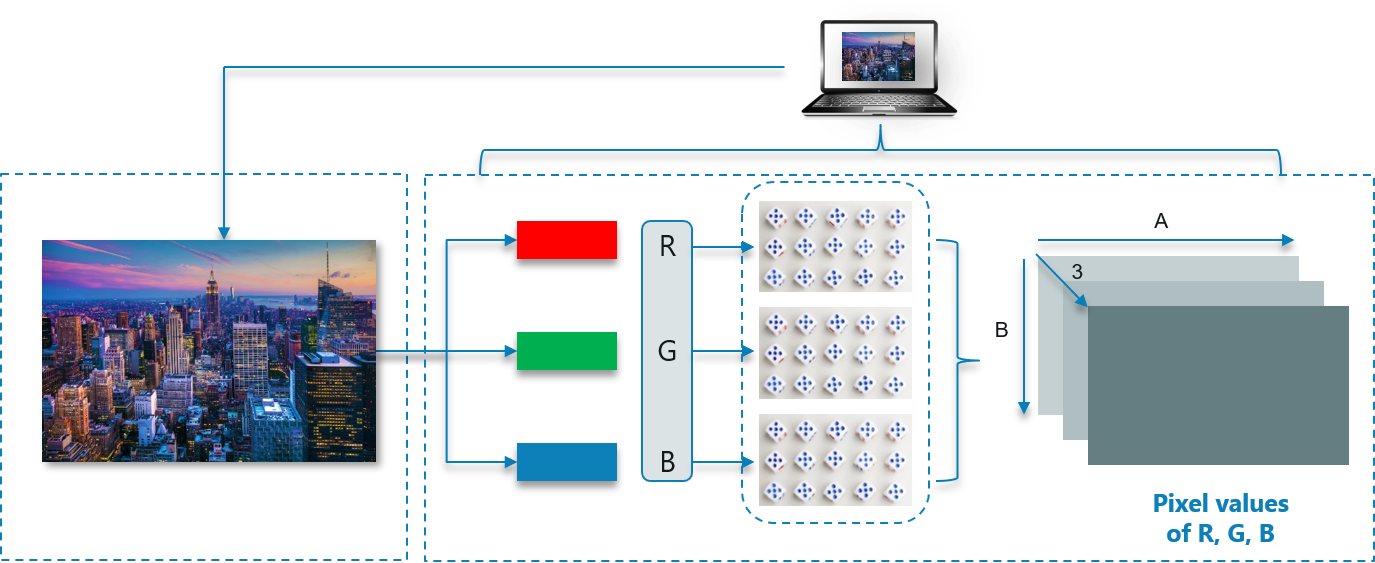

**Based in [Basic Image Analysis with scikit-image](https://github.com/TheJacksonLaboratory/Basic_skimageJAX)**

Aditional material

[scikit-image API reference](http://scikit-image.org/docs/stable/api/api.html)

["Official" scikit-image tutorial](https://github.com/scikit-image/skimage-tutorials)

[scikit-image tutorial on YouTube](https://www.youtube.com/watch?v=pZATswy_IsQ)

Digital images are represented as numeric arrays of two dimension: x and y if the image is gray scale, three dimensions (x, y and channels) if the image has color. Ordering of dimensions becomes somewhat arbitrary, and different packages/software will use different conventions for how arrays are ordered. We will use the conventions of [scikit-image](https://scikit-image.org/) for indexing.

## Images as 2D (grayscale) or 3D (2D color) arrays

The simplest image to work with is a grayscale image. These are represented as 2D arrays, where each position in the array corresponds to a single pixel. Brighter (whiter) parts of the image are represented by larger values, and darker parts of the image are represented by smaller values. The values themselves may differ with respect to type.

It might be useful at this point to review [numpy data types](https://docs.scipy.org/doc/numpy-1.16.1/reference/arrays.scalars.html#built-in-scalar-types).
The most common types you will encounter are:

* uint8 - integers between 0-255
* uint16 - integers between 0-65,535
* float64(or double) - floating point numbers, e.g., 1.45643, 5.0, 1.23435e9

`scikit-image` functions will usually output float64 values, regardless of which data type you start with, but these can usually be safely converted back to the original type.

In the following parrot image, values are `uint8` and thus range from 0-255:
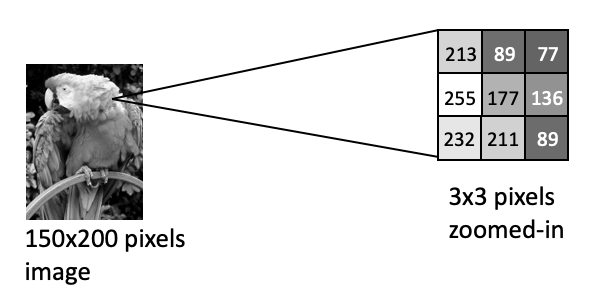


Notice how the brightest pixel is 255, and the darker pixels have much lower values.

Color images are conceptually similar, except each "pixel" has three values, corresponding a a red, green and blue value. Consider the clown image below:

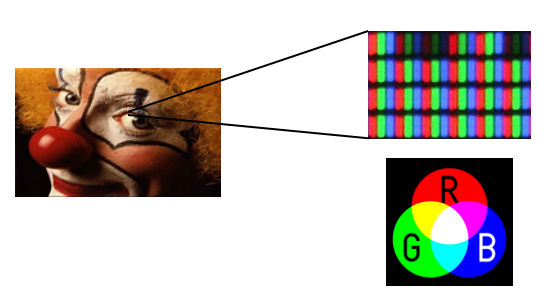

Because human photoreceptors are tuned to red, green, and blue wavelengths, all of the colors we can see can be represented as a combination of red, green, and blue light. Thus if you were to look at your monitor under a microscope, you would notice the the clown image is actually composed of an array of tightly packed red, green and blue elements. Hence each pixel has a red, green, and blue value:
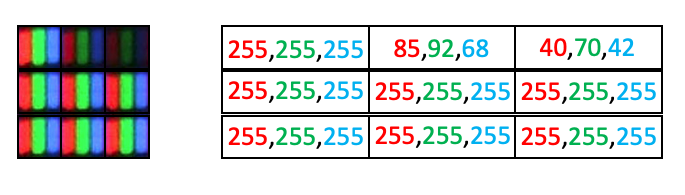

However, arrays can only hold one value per position. So 2D color images actually need to be represented as 3D arrays, where each plane in the color dimension (channel) represents a different color.
In `scikit-image`, the indexing convention for color images is `(row, column, channel)`, where the three colors are represented as three channels, with the ordering `{0: 'red', 1: 'green', 2: 'blue'}`.

The maximum number of dimensions we usually have to deal with in image analysis is five: time, plane (z axis), row (y axis), column (x axis), channel. In `scikit-image`, you will often see the ordering stated like this:
`(t, pln, row, col, ch)`.



## Working with 2-D color images

Now let's take a look at using `scikit-image` (abbreviated as `skimage`) to work with a two-dimensional color image. We need to first start with some imports. We will use `numpy` for working with arrays and `skimage` for loading and visualizing image data and performing some basic operations:

In [ ]:
## if there exist problem install the library
!pip install -U scikit-image

In [ ]:
import skimage
print(skimage.__version__)


0.18.3


In [ ]:
import numpy as np
from skimage import data, io

`skimage` comes with some example data:

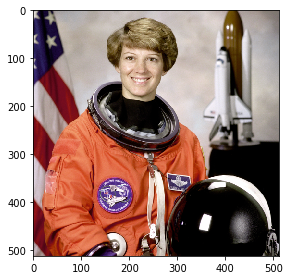

In [ ]:
image = data.astronaut()
io.imshow(image)

Some useful info about the image array

In [ ]:
print(type(image))
print(image.dtype)

print(image.shape)
print(image.flatten().shape)
image

<class 'numpy.ndarray'>
uint8
(512, 512, 3)
(786432,)


array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ...,
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ...,
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ...,
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ...,

       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ...,
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ...,
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,   0]]

In [ ]:
image[20,20,:]

array([2, 1, 6], dtype=uint8)

Select a part of the image

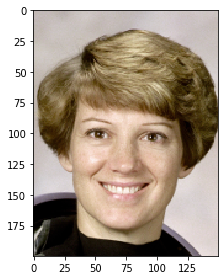

In [ ]:
face = image[0:200, 150:300, :]
face.shape
io.imshow(face);

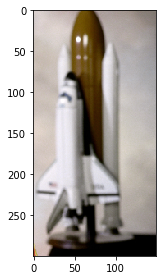

In [ ]:
# intenta ver solo el cohete

### Exercise

Try to see only an eye of the austronaut

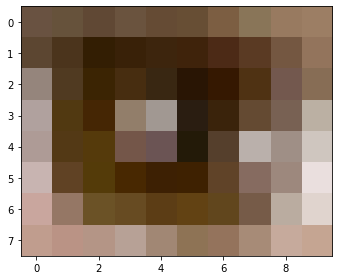

In [ ]:
eye = face[97:105, 49:59,:]
io.imshow(eye)

### Exercise

1. Try doing some math with the 'eye' array. What happens when an operation results in a value outside of 0-255?

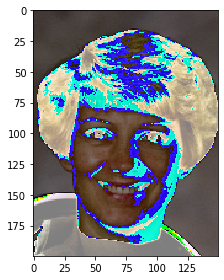

In [ ]:
io.imshow(face+127)

### Attributes and methods of numpy arrays

Transposed shape:  (3, 150, 200)


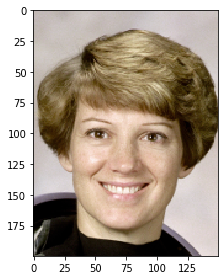

In [ ]:
print('Transposed shape: ', face.T.shape)
io.imshow(face)

The next few tips are easier to demonstrate with a smaller array:

In [ ]:
a = np.array([[1,2,3],[4,5,6],[0,0,0]])
a

array([[1, 2, 3],
       [4, 5, 6],
       [0, 0, 0]])

In [ ]:
print(a.max())
print(a.max(axis=0))
print(a.max(axis=1))
print(a.nonzero())
print(a[a.nonzero()])
print(a>3)
print((a > 3) & (a < 6))
print(a[(a > 3) & (a < 6)])
a[(a > 3) & (a < 6)] = 255
print(a)
np.where(a == 255)

6
[4 5 6]
[3 6 0]
(array([0, 0, 0, 1, 1, 1]), array([0, 1, 2, 0, 1, 2]))
[1 2 3 4 5 6]
[[False False False]
 [ True  True  True]
 [False False False]]
[[False False False]
 [ True  True False]
 [False False False]]
[4 5]
[[  1   2   3]
 [255 255   6]
 [  0   0   0]]


(array([1, 1]), array([0, 1]))

### Exercise

1. Display a cropped white and black image of the [astronaut's](https://en.wikipedia.org/wiki/Eileen_Collins) face.
2. Display a cropped color image of the model space shuttle in the image.
3. Display each color channel of image\[0:200, 0:100\] in grayscale.
    * Which channel is red?
    * Which channel is blue?
    * Which channel is green?
4. **\[Extra challenge\]** Create a new astronaut image where:
    * all perfectly white (r,g,b=255) pixels have been converted to red (r=255; g,b=0)
    * all perfectly black (r,g,b=0) pixels have been converted to blue (r,g=0; b=255)

## File reading and writing

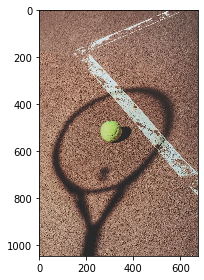

In [ ]:
from skimage import io
blocks=io.imread('https://images.unsplash.com/photo-1546339851-35c3ad161812?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=674&q=80')
io.imshow(blocks);

Convert to different color representation

- [skimage.colorrgb2gray(rgb, *[, channel_axis])](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2gray) Compute luminance of an RGB image. The weights used in this conversion are calibrated for contemporary CRT phosphors: Y = 0.2125 R + 0.7154 G + 0.0721 B
- skimage.colorrgb2hed(rgb, *[, channel_axis]) RGB to Haematoxylin-Eosin-DAB (HED) color space conversion.
- [skimage.colorrgb2hsv(rgb, *[, channel_axis])](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2hsv) RGB to HSV color space conversion.
- skimage.colorrgb2lab(rgb[, illuminant, ...]) Conversion from the sRGB color space (IEC 61966-2-1:1999) to the CIE Lab colorspace under the given illuminant and observer.
- skimage.colorrgb2rgbcie(rgb, *[, channel_axis]) RGB to RGB CIE color space conversion.
- skimage.colorrgb2xyz(rgb, *[, channel_axis]) RGB to XYZ color space conversion.
- skimage.colorrgb2ycbcr(rgb, *[, channel_axis]) RGB to YCbCr color space conversion.
- skimage.colorrgb2ydbdr(rgb, *[, channel_axis]) RGB to YDbDr color space conversion.
- skimage.colorrgb2yiq(rgb, *[, channel_axis]) RGB to YIQ color space conversion.
- skimage.colorrgb2ypbpr(rgb, *[, channel_axis]) RGB to YPbPr color space conversion.
- skimage.colorrgb2yuv(rgb, *[, channel_axis]) RGB to YUV color space conversion.

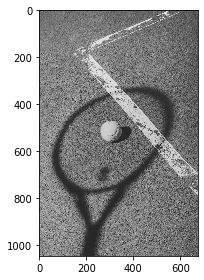

In [ ]:
from skimage.color import rgb2gray
blocks_bw = rgb2gray(blocks)
io.imshow(blocks_bw)

Exist many util function to apply over the image. 

[skimage.util](https://scikit-image.org/docs/stable/api/skimage.util.html) 

float64
uint8


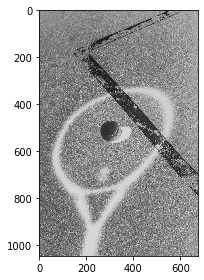

In [ ]:
from skimage.util import invert,img_as_ubyte
blocks_invert = invert(blocks_bw)
print(blocks_invert.dtype)
blocks_invert = img_as_ubyte(blocks_invert)
print(blocks_invert.dtype)
io.imshow(blocks_invert);

In [ ]:
io.imsave('blocks_invert.png', blocks_invert)
io.imsave('blocks_invert.tif', blocks_invert)
io.imsave('blocks_invert.jpg', blocks_invert)

## Example

This example illustrates how RGB to HSV (Hue, Saturation, Value)[wiki](https://en.wikipedia.org/wiki/HSL_and_HSV) conversion 1 can be used to facilitate segmentation processes.

Usually, objects in images have distinct colors (hues) and luminosities, so that these features can be used to separate different areas of the image. In the RGB representation the hue and the luminosity are expressed as a linear combination of the R,G,B channels, whereas they correspond to single channels of the HSV image (the Hue and the Value channels). A simple segmentation of the image can then be effectively performed by a mere thresholding of the HSV channels.

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv

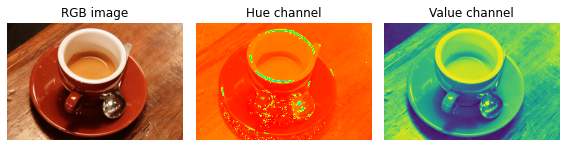

In [ ]:
rgb_img = data.coffee()
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(8, 2))

ax0.imshow(rgb_img)
ax0.set_title("RGB image")
ax0.axis('off')
ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

We then set a threshold on the Hue channel to separate the cup from the background:

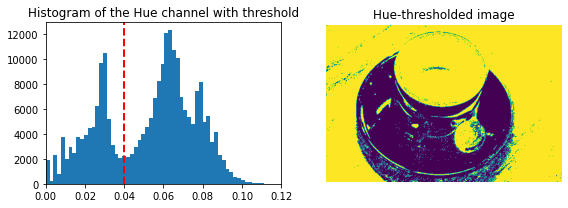

In [ ]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

We finally perform an additional thresholding on the Value channel to partly remove the shadow of the cup:

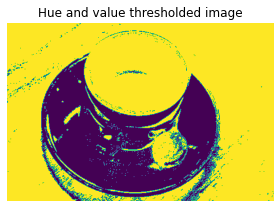

In [ ]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show()

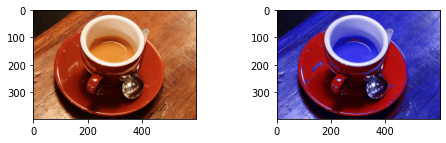

In [ ]:
import numpy as np
from skimage.color import hsv2rgb
hsv_img[:, :, 0]=np.uint8(binary_img)*255
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 2))

ax0.imshow(rgb_img)
ax1.imshow(hsv2rgb(hsv_img))

## Exercise

Describe one alternative representation of the rgb model with your uses in digital image processing